<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab using BeautifulSoup 


_Instructor: Husain Amer_

### Learning Objectives
- Utilize Beautiful Soup to extract information from HTML 


### What is Beautiful Soup?
---

- It is a popular Python library for web scraping (parse the HTML).

#### Install Beautiful Soup

Students will need to install Selenium using one of the following:
- **Anaconda:** `conda install -c anaconda beautifulsoup4`
- **pip:** `pip install beautifulsoup4`

In [3]:
#### Web scraping steps :

## Step 1 : Download Html page 
## Step 2 : Parsing data (BS)
## Step 3 : Save data in dataframe

# Exercise 1 :
---

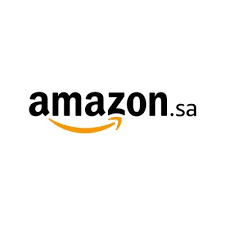


## Let's Scrape (Mobiles prices / Amazon Saudi) headlines

<br>
Let's take their 

[Apple Mobile Prices in Amazon Saudi](https://www.amazon.sa/Mobile-Phones-Apple-Communication/s?rh=n%3A16966419031%2Cp_89%3AApple&language=en&ref=SQSA-WEB-GT301)

headlines using Python **requests**, and practice selecting various elements.

Build a new dataframe as :

|mobile_name|price|Capacity
|---|---|---|
|Apple iPhone 12 Pro...|1500|256GB|
| ...|...|...|
| ...|...|...|

let's start by explore the structure of the page

In [1]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup

In [5]:
## Step 1 : Download Html page 

In [2]:
response = requests.get('https://www.amazon.sa/Mobile-Phones-Apple-Communication/s?rh=n%3A16966419031%2Cp_89%3AApple&language=en&ref=SQSA-WEB-GT301')


In [3]:
# what is the status code? did all go fine?
response.status_code

200

In [44]:
# No Code Here


200

[Here is a list of html status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

In [9]:
# step 2 :parsing using beautifulsoup


In [4]:
soup1 = BeautifulSoup(response.text, 'html.parser')#'lxml')  # build tree

Find all `'div'` with `attrs={'class':'sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col sg-col-4-of-20'}`

In [67]:
# put the find_all list in a variable called items

# Complete the code
items= soup1.find_all('div',attrs={'class':"sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col sg-col-4-of-20"})

In [6]:
len(items)

24

In [40]:
# Find the length of the list created by find all 
len(items)

24

`soup.find()`   -- > soup object
<br>
`soup.find().text`  -- > string

Create a list of mobile names and prices please, hint : for loop!

In [68]:
mobile_name=[]
mobile_price=[]

# Extra code here
for item in items:
    mobile_name.append(item.find('span',attrs={'class':"a-size-base-plus a-color-base a-text-normal"}).string)
    try:
        mobile_price.append(item.find('span',attrs={'class':'a-price-whole'}).text[:-1])
    except:
        mobile_price.append(None)    

In [39]:
# Check the length of each list and make sure they are equal
len(mobile_name),len(mobile_price)

(24, 24)

In [53]:
# Check the length of each list and make sure they are equal
len(mobile_name),len(mobile_price)

(24, 24)

In [35]:
# let's take a look at the mobile_name list
mobile_name

['Apple iPhone 12 Pro Max with Face Time - 256GB, 5G, Pacific Blue',
 'Apple iPhone 12 Pro with Face Time - 256GB, 5G, Silver',
 'Apple iPhone 12 with Face Time- 64GB,5G (PRODUCT) RED',
 'Apple iPhone 12 with Face Time-128GB,5G, Blue',
 'Apple Iphone 7 With Facetime - 128 GB, 4G LTE, Gold, 2 GB Ram, Single Sim',
 'Apple iPhone 12 mini with Face Time -128GB,5G, Blue',
 'Apple iPhone SE - 64GB, 4G LTE - Red',
 'Apple iPhone 12 with Face Time- 64GB,5G,White',
 'Apple iPhone 11 with FaceTime - 128GB, 4GB RAM, 4G LTE, Red, Single SIM & E-SIM',
 'Apple iPhone 12 Pro Max with Facetime - 256GB, 5G, Silver - Physical Dual Sim HK Specs',
 'Apple iPhone 7 without FaceTime - 128GB, 4G LTE, Black',
 'Apple iPhone Xs Max Without FaceTime - 64GB, 4G LTE, Space Gray',
 'Apple iPhone 8 with FaceTime - 256GB, 4G LTE, Space Grey',
 'Apple iPhone 11 Pro with FaceTime - 64GB, 4GB RAM, 4G LTE, Space Gray, Single SIM & E-SIM',
 'Apple Iphone XS Max With Facetime - 256 GB, 4G LTE, Gold, 4 GB Ram, Single Sim &

In [54]:
# let's take a look at the mobile_name list
mobile_name

['Apple iPhone 12 Pro Max with Face Time - 256GB, 5G, Pacific Blue',
 'Apple iPhone 12 with Face Time-128GB,5G, Blue',
 'Apple iPhone 12 Pro with Face Time - 256GB, 5G, Gold',
 'Apple iPhone 8 with FaceTime - 256GB, 4G LTE, Space Grey',
 'Apple iPhone 12 mini with Face Time -128GB,5G, Black',
 'Apple Iphone XS Max With Facetime - 256 GB, 4G LTE, Gold, 4 GB Ram, Single Sim & E-Sim',
 'Apple iPhone 8 with Facetime 256 GB, 4G LTE, Red',
 'Apple iPhone 11 with FaceTime - 128GB, 4GB RAM, 4G LTE, Green, Single SIM & E-SIM',
 'Apple iPhone SE - 128GB, 4G LTE - White',
 'Apple iPhone 11 Pro with FaceTime - 64GB, 4GB RAM, 4G LTE, Space Gray, Single SIM & E-SIM',
 'Apple Iphone X With Facetime - 64 GB, 4G LTE, Silver, 3 GB Ram, Single Sim',
 'Apple iPhone 7 without FaceTime - 128GB, 4G LTE, Black',
 'Apple iPhone 6S Plus\xa0with FaceTime\xa0- 128GB, 4G LTE, Space Gray',
 'Apple iPhone 7 with FaceTime - 128GB, 4G LTE, Rose Gold, 4.7 Inch',
 'Apple Iphone 7 With Facetime - 128 GB, 4G LTE, Gold, 2 

In [40]:
## Step 3 : Save data in dataframe
df = pd.DataFrame({'mobile_name':mobile_name,'price':mobile_price})

In [41]:
df.head()

,mobile_name,price
0,Apple iPhone 12 Pro Max with Face Time - 256GB...,"5,499"
1,"Apple iPhone 12 Pro with Face Time - 256GB, 5G...","5,199"
2,"Apple iPhone 12 with Face Time- 64GB,5G (PRODU...","3,565"
3,"Apple iPhone 12 with Face Time-128GB,5G, Blue","3,859"
4,"Apple Iphone 7 With Facetime - 128 GB, 4G LTE,...","1,566"


In [78]:
df.head()

,mobile_name,price
0,Apple iPhone 12 Pro Max with Face Time - 256GB...,"5,499"
1,"Apple iPhone 12 with Face Time-128GB,5G, Blue","3,859"
2,"Apple iPhone 12 Pro with Face Time - 256GB, 5G...","5,196"
3,"Apple iPhone 8 with FaceTime - 256GB, 4G LTE, ...","2,194"
4,"Apple iPhone 12 mini with Face Time -128GB,5G,...","3,398"


- Extract the mobile capacity size in a new column, extract it from the mobile name

In [57]:
# Step 4: Extract the mobile capacity size in a new column, extract it from the mobile name

# NOTE : you may get errors while doing the split of the mobile capacity since some mobiles does not have a capacity written .. 
# or the format of the name id is not the same for all the mobile name. In this case, use "try:" and "except:" to ..
# append(None) if it could not get the capacity
import re

mobile_capacity=[]


# Extra code here
for item in items:
    try:
        m = re.search('([0-9]{2,3}\s*[G][B])', item.find('span',attrs={'class':"a-size-base-plus a-color-base a-text-normal"}).string)
        if m:
            found = m.group(1)
            mobile_capacity.append(found)
        else:
            mobile_capacity.append(None)
    except:
        mobile_capacity.append(None)

In [58]:
## Step 5 : Save capacity in the dataframe 
df = pd.DataFrame({'mobile_name':mobile_name,'price':mobile_price,'Capacity':mobile_capacity})

In [59]:
df.head()

,mobile_name,price,Capacity
0,Apple iPhone 12 Pro Max with Face Time - 256GB...,"5,499",256GB
1,"Apple iPhone 12 Pro with Face Time - 256GB, 5G...","5,199",256GB
2,"Apple iPhone 12 with Face Time- 64GB,5G (PRODU...","3,565",64GB
3,"Apple iPhone 12 with Face Time-128GB,5G, Blue","3,859",128GB
4,"Apple Iphone 7 With Facetime - 128 GB, 4G LTE,...","1,566",128 GB


In [62]:
df.head()

,mobile_name,price,Capacity
0,Apple iPhone 12 Pro Max with Face Time - 256GB...,"5,499",256GB
1,"Apple iPhone 12 with Face Time-128GB,5G, Blue","3,859",128GB
2,"Apple iPhone 12 Pro with Face Time - 256GB, 5G...","5,196",256GB
3,"Apple iPhone 8 with FaceTime - 256GB, 4G LTE, ...","2,194",256GB
4,"Apple iPhone 12 mini with Face Time -128GB,5G,...","3,398",128GB


# Exercise 2 : MEDIUM Blogs
---

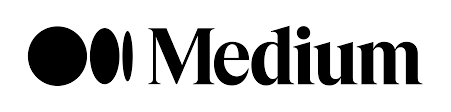


## Let's Scrape (Number of Clabs, Name and Date)


In [61]:
response3 = requests.get('https://medium.com/search?q=data%20science')

response3.status_code

200

In [62]:
soup3 = BeautifulSoup(response3.text, 'html.parser')#'lxml')

In [72]:
#Create the dataframe below!
items1 = soup3.find_all('div',attrs={'class':"u-paddingTop20 u-paddingBottom25 u-borderBottomLight js-block"})
claps=[]
name=[]
date=[]

# Extra code here
for item in items1:
    date.append(item.find('time').string)
    name.append(item.find('a',attrs={'class':"ds-link ds-link--styleSubtle link link--darken link--accent u-accentColor--textNormal u-accentColor--textDarken"}).string)
    claps.append(item.find('button',{'class':"button button--chromeless u-baseColor--buttonNormal js-multirecommendCountButton u-disablePointerEvents"}).string)

medium = pd.DataFrame({'claps':claps,'name':name,'date':date})

In [73]:
medium

,claps,name,date
0,22K,Harrison Jansma,"Sep 15, 2018"
1,18.4K,Michael Galarnyk,"Jul 8, 2018"
2,19.3K,Civis Analytics,"Jun 8, 2018"
3,7.3K,David Venturi,"Sep 26, 2016"
4,13.7K,Tirthajyoti Sarkar,"Aug 8, 2018"
5,6.4K,David Venturi,"Jan 25, 2017"
6,11.6K,Parul Pandey,"Dec 18, 2018"
7,7.1K,David Venturi,"May 31, 2017"
8,10.7K,Conor Dewey,"Jun 5, 2018"


In [73]:
medium

,claps,name,date
0,22K,Harrison Jansma,"Sep 15, 2018"
1,18.4K,Michael Galarnyk,"Jul 8, 2018"
2,19.3K,Civis Analytics,"Jun 8, 2018"
3,7.3K,David Venturi,"Sep 26, 2016"
4,13.7K,Tirthajyoti Sarkar,"Aug 8, 2018"
5,6.4K,David Venturi,"Jan 25, 2017"
6,11.6K,Parul Pandey,"Dec 18, 2018"
7,7.1K,David Venturi,"May 31, 2017"
8,10.7K,Conor Dewey,"Jun 5, 2018"
9,8.4K,David Venturi,"Apr 19, 2016"
